# Masking

Using a mask allows us to focus only on the portions of the image that interests us. For example, let’s say that we were building a computer vision system to recognize faces. The only part of the image we are interested in finding and describing are the parts of the image that contain faces – we simply don’t care about the rest of the content of the image. Provided that we could find the faces in the image, we might construct a mask to show only the faces in the image.



## Bitwise operatations

There are four bitwise operations: AND, OR, XOR, and NOT. These four operations, while very basic and low level, are paramount to image processing, espe- cially when we start working with masks.

Bitwise operations operate in a binary manner and are represented as grayscale images. A given pixel is turned “off” if it has a value of zero, and it is turned “on” if the pixel has a value greater than zero.

### Import resources

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

We are going to create simple images and masks using numpy. Then, we are going to use the masks to modify the images.

We can use the opencv "rectangle" or "circle" methods to draw a rectangle or a circle on an image. 

The arguments of the method are the following:

Rectangle:
- Upper left corner
- Lower right corner

Circle:
- Center
- Radius

Both:
- img : The image where you want to draw the shapes
- color : Color of the shape. for BGR, pass it as a tuple, eg: (255,0,0) for blue. For grayscale, just pass the scalar value.
- thickness : Thickness of the line or circle etc. If -1 is passed for closed figures like circles, it will fill the shape. default thickness = 1

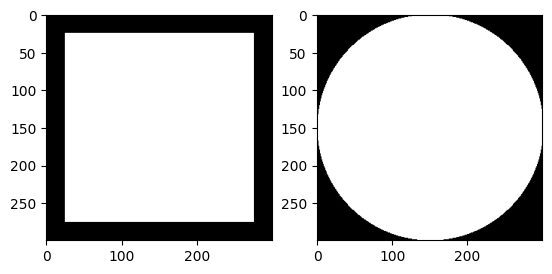

In [17]:
rectangle = np.zeros((300,300), dtype=np.uint8)
circle = np.zeros((300, 300), dtype=np.uint8)

cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
cv2.circle(circle, (150, 150), 150, 255, -1 )

f, (r_ax, c_ax) = plt.subplots(1, 2)
r_ax.imshow(rectangle, cmap='gray')
c_ax.imshow(circle, cmap='gray')

A given pixel is turned “on” if it has a value greater than zero, and it is turned “off” if it has a value of zero. Bitwise functions operate on these binary conditions. In order to utilize bitwise functions, we assume (in most cases) that we are comparing two pixels (the only exception is the NOT function). We’ll compare each of the pixels and then construct our bitwise representation.

A quick review our binary operations:

1. AND: A bitwise AND is true if and only if both pixels are greater than zero.
2. OR: A bitwise OR is true if either of the two pixels are greater than zero.
3. XOR: A bitwise XOR is true if and only if either of the two pixels are greater than zero, but not both.
4. NOT: A bitwise NOT inverts the “on” and “off” pixels in an image.

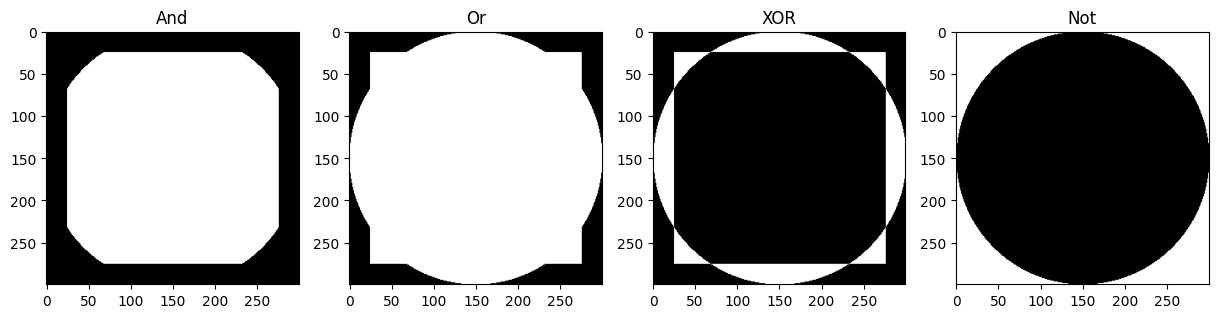

In [38]:
'''
Parameters:
- src1	first input array or a scalar.
- src2	second input array or a scalar.
- dst	output array that has the same size and type as the input arrays.
- mask	optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.
'''
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
bitwiseOr = cv2.bitwise_or(rectangle, circle)
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
bitwiseNot = cv2.bitwise_not(circle)

f, axes = plt.subplots(1, 4, figsize=(15, 10))
axes[0].set_title("And")
axes[1].set_title("Or")
axes[2].set_title("XOR")
axes[3].set_title("Not")
axes[0].imshow(bitwiseAnd, cmap='gray')
axes[1].imshow(bitwiseOr, cmap='gray')
axes[2].imshow(bitwiseXor, cmap='gray')
axes[3].imshow(bitwiseNot, cmap='gray')

## Color Threshold, Blue Screen

In this case, we are going to create a mask that consists of all the pixels that are within a specific range of blues, and use that to change the background to something else.

<tr>
<td> <img src="images/pizza_bluescreen.jpg" alt="Pizza blue background" style="width: 500px;"/> </td>
<td> <img src="images/pizza_newbackground.png" alt="Pizza new background" style="width: 500px;"/> </td>
</tr>

### Read in and display the image

In [19]:
# Read in the image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print(f'This image is: {type(image)} with dimensions:  {image.shape}')

This image is: <class 'numpy.ndarray'> with dimensions:  (514, 816, 3)


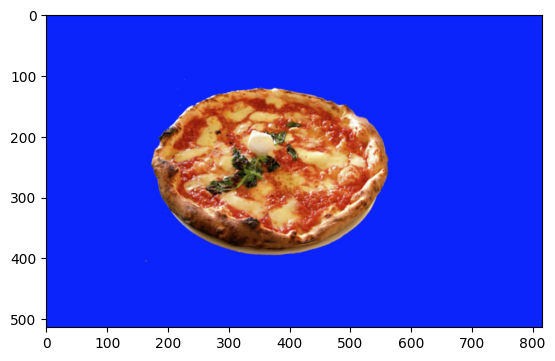

In [20]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

### Define the color threshold

In [21]:
# Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
lower_blue = np.array([0,0,180]) 
upper_blue = np.array([70,70,255])

### Create a mask

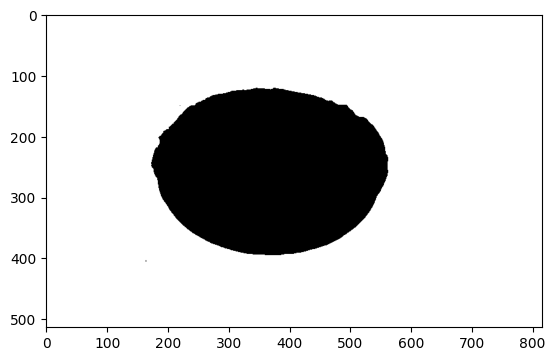

In [22]:
# Define the masked area
# The inRange method checks if array elements lie between the elements of two other arrays. In this case, checks whether a pixel is within two other colors.
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


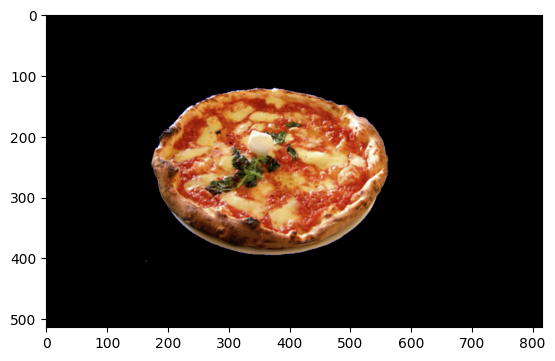

In [23]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

# Getting some elements out of an existing array and creating a new array out of them is called filtering.
# In NumPy, you can filter an array using a boolean index list. I this case, we can use a boolean condition to generate said index list.
filter = mask != 0

print(filter)

masked_image[filter] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

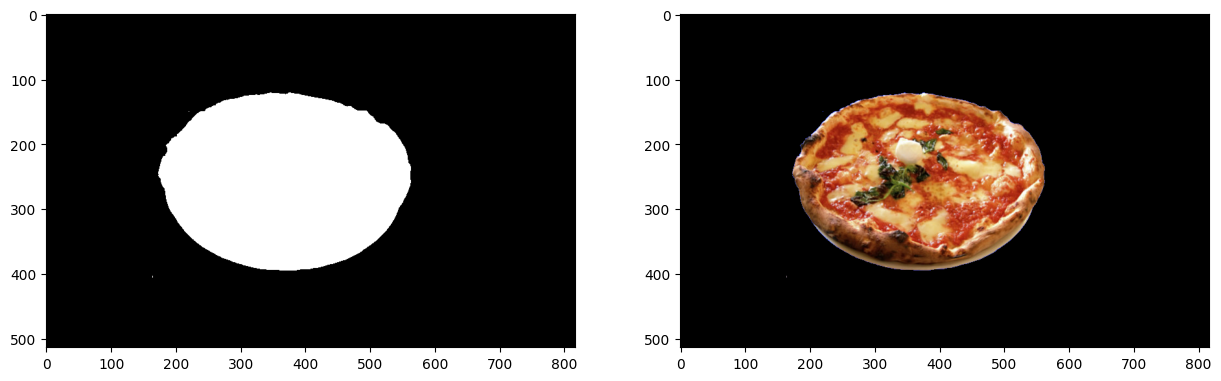

In [45]:
# Mask the image to let the pizza show through
masked_image_bitwise = np.copy(image_copy)

# You can use bitwise operations to apply the mask.
mask_inverted = cv2.bitwise_not(mask)
masked_image_bitwise = cv2.bitwise_and(masked_image_bitwise, masked_image_bitwise, mask=mask_inverted)

f, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(mask_inverted, cmap='gray')
axes[1].imshow(masked_image_bitwise)

### Mask and add a background image

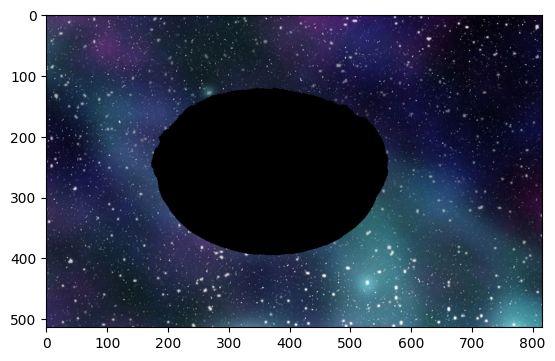

In [ ]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = background_image[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

### Create a complete image

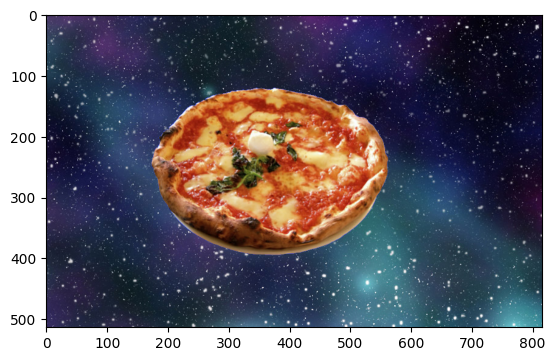

In [ ]:
# Add the two images together to create a complete image
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)